In [54]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

Calculate violations per officer

In [2]:
actuals = pd.read_csv('2016_estimations.csv')

In [3]:
url = 'https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD'
arrests = pd.read_csv(url)
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [ ]:
#violent = [139,140,153,155,157,164,166,168,175,176
          #,177,178,179,180,183,185,187,261,263,379
           #,380,397,586,639,640,665,104,105,106,
          #107,109,112,122,123,124,125,129]
#qol = [789,566,258,610, 612, 614, 616, 622, 803, 862]

In [4]:
violations = pd.read_csv('violation_codes.csv')

In [5]:
violations.violation_codes = violations.violation_codes.astype('str')

In [6]:
violation_codes = violations.violation_codes.to_list()

In [7]:
arrests['year'] = arrests['ARREST_DATE'].str[-2:]
arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,17
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,17
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,17
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074,17
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811,17


In [8]:
#arrests = arrests[(arrests['PD_CD'].isin(violent))|(arrests['PD_CD'].isin(qol))]
arrests = arrests[arrests['PD_CD'].isin(violation_codes)]

In [9]:
#arrests.loc[arrests['PD_CD'].isin(violent), 'category'] = 'vio'
#arrests.loc[arrests['PD_CD'].isin(qol), 'category'] = 'qol'

In [10]:
arrests = arrests.loc[arrests.year == '15']

In [11]:
grouped = arrests.groupby('ARREST_PRECINCT')['ARREST_KEY'].count().reset_index()
grouped.head()

,ARREST_PRECINCT,ARREST_KEY
0,1,765
1,5,1253
2,6,574
3,7,261
4,9,335


In [12]:
patrol_pop = pd.read_csv('patrol_population.csv')

In [13]:
patrol_pop['ticketers'] = patrol_pop.police_officer + patrol_pop.sergeant
patrol_pop.head()

,precinct,above_captain,captain,detective,lieutenant,police_officer,sergeant,grand_total,ticketers
0,1,NaN,1.0,2.0,7,162,23,195,185
1,5,1.0,1.0,1.0,6,130,18,157,148
2,6,1.0,2.0,2.0,7,149,22,183,171
3,7,NaN,2.0,1.0,7,122,19,151,141
4,9,1.0,1.0,1.0,6,117,19,145,136


In [14]:
total_po = patrol_pop.police_officer.sum()

In [15]:
total_ser = patrol_pop.sergeant.sum()

In [16]:
total_ticketers = total_po + total_ser
total_ticketers

13202

In [17]:
violations = grouped.ARREST_KEY.sum()

In [18]:
violations / total_ticketers.astype(float)

2.338130586274807

In [19]:
violations_by_precinct = pd.merge(patrol_pop, grouped, left_on = 'precinct', right_on='ARREST_PRECINCT')

In [20]:
violations_by_precinct['ticketers'] = violations_by_precinct.police_officer + violations_by_precinct.sergeant

In [21]:
violations_precinct = violations_by_precinct.loc[:,['ticketers','precinct','ARREST_KEY']]

In [22]:
violations_precinct['violations_per_ticketer'] = violations_precinct.ARREST_KEY / violations_precinct.ticketers.astype(float)

In [23]:
violations_precinct

,ticketers,precinct,ARREST_KEY,violations_per_ticketer
0,185,1,765,4.135135
1,148,5,1253,8.466216
2,171,6,574,3.356725
3,141,7,261,1.851064
4,136,9,335,2.463235
5,145,10,242,1.668966
6,173,13,1058,6.115607
7,288,14,2726,9.465278
8,134,17,213,1.589552
9,267,18,1219,4.565543


In [24]:
sectors = 'https://data.cityofnewyork.us/api/geospatial/eizi-ujye?method=export&format=GeoJSON'

In [25]:
sector_map = gpd.read_file(sectors)

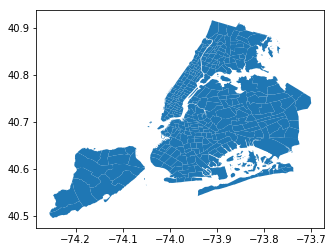

In [26]:
sector_map.plot()

In [27]:
sector_map.head()

,start_date,phase,sector,sct_text,sctr_float,sq_feet,pct,sq_mile_new,patrol_bor,sq_miles,geometry
0,2018-07-09T00:00:00,14,102A,102A,0,39273808.2712,102,1.40875402717,PBQS,1.40875966239,(POLYGON ((-73.84119605660885 40.6833513662922...
1,2018-07-09T00:00:00,14,102B,102B,1,29396261.78,102,1.05444579961,PBQS,1.05445001755,(POLYGON ((-73.84451063791278 40.6824150883497...
2,2018-07-09T00:00:00,14,102C,102C,2,23756857.9637,102,0.85216002223,PBQS,0.852163430991,(POLYGON ((-73.82610502096314 40.7155683333836...
3,2018-07-09T00:00:00,14,102D,102D,3,40887542.661,102,1.46663878347,PBQS,1.46664465023,(POLYGON ((-73.83680747734981 40.7084400414430...
4,2018-10-01T00:00:00,15,104A,104A,4,44515913.6565,104,2.19402039287,PBQN,1.59679507169,(POLYGON ((-73.85844504726241 40.7057827876929...


In [28]:
streets = 'https://planninglabs.carto.com/api/v2/sql?format=SHP&filename=citymap_citymap_v1&q=SELECT%20*%20FROM%20citymap_citymap_v1'

In [29]:
streets = gpd.read_file(streets)

In [30]:
streets.head()

,cartodb_id,type,feature_ty,ownership_,boro_nm,shape_stle,shape_st_1,geometry
0,163,Private Street,ROW,Private,Manhattan,1538.480633,1538.480633,(LINESTRING (-73.92143739037765 40.86046231075...
1,267,street_treatment,None,None,Manhattan,40.711867,40.711867,LINESTRING (-73.99993335811318 40.743405879083...
2,302,street_treatment,None,None,Manhattan,26.025298,26.025298,LINESTRING (-73.97475041133856 40.746117432080...
3,304,street_treatment,None,None,Manhattan,12.730387,12.730387,LINESTRING (-73.9235403158592 40.7982872593284...
4,314,street_treatment,None,None,Manhattan,83.719306,83.719306,LINESTRING (-73.92126351436777 40.781853511682...


In [ ]:
arterials = 'https://planninglabs.carto.com/api/v2/sql?format=SHP&filename=citymap_arterials_v0&q=SELECT%20*%20FROM%20citymap_arterials_v0'

In [ ]:
arterials = gpd.read_file(arterials)

In [ ]:
arterials.route_type.value_counts()

In [31]:
streets_by_precinct = pd.read_csv('major_street_length.csv')

In [32]:
streets_by_precinct['sq_miles'] = streets_by_precinct.shape_area / 1000 * 0.000386102

In [33]:
crash_data = pd.read_csv('crash_data.csv')

In [34]:
crash_data = crash_data.loc[:, ['precinct','total2018']]

In [35]:
crash_data.precinct = crash_data.precinct.astype(int)

In [36]:
crash_data.head()

,precinct,total2018
0,1,3307
1,5,2196
2,6,1433
3,7,1254
4,9,1205


In [37]:
cfs = pd.read_csv('calls_by_precinct.csv')

In [38]:
cfs = cfs.loc[:,['Precinct','total']]

In [39]:
cfs.rename(columns={'total':'cfs', 'Precinct':'precinct'}, inplace=True)
crash_data.rename(columns={'total2018':'crashes'}, inplace=True)

In [40]:
df = pd.merge(cfs, crash_data, left_on = 'precinct', right_on = 'precinct')
final_df = pd.merge(df, streets_by_precinct, left_on = 'precinct', right_on = 'precinct')
final_df = pd.merge(final_df, patrol_pop, left_on='precinct', right_on = 'precinct')

In [41]:
final_df['cfs'] = final_df.cfs - final_df.crashes

In [42]:
final_df.drop('Unnamed: 6', axis=1, inplace=True)
final_df.fillna(0, inplace=True)

In [43]:
final_df.head()

,precinct,cfs,crashes,shape_area,shape_leng,major_leng,arterial_l,all_street,sq_miles,above_captain,captain,detective,lieutenant,police_officer,sergeant,grand_total,ticketers
0,1,160643,3307,4.730176e+07,80586.15462,5.927949,4.94278,82.34928,18.263305,0.0,1.0,2.0,7,162,23,195,185
1,10,74441,2665,2.721450e+07,39279.11727,4.942269,4.18170,51.60769,10.507575,0.0,2.0,4.0,6,125,20,157,145
2,100,33182,714,2.051852e+08,283995.94510,9.813747,5.31802,232.66629,79.222419,0.0,2.0,2.0,7,110,18,139,128
3,101,60440,1071,8.467270e+07,78292.58242,3.155442,3.36603,117.38970,32.692298,1.0,1.0,2.0,7,162,23,196,185
4,102,105919,3907,1.333145e+08,52865.28107,13.722699,5.95985,212.29415,51.472984,1.0,1.0,0.0,6,157,22,187,179


In [44]:
259584.0 / final_df.cfs.sum()

0.0323515277442666

In [45]:
final_df[final_df.precinct == 1].crashes.sum()

3307

In [46]:
pam_model_feeder = pd.read_csv('pam_model_inputs.csv')

In [47]:
param_helper = pam_model_feeder.loc[:,['Code','Values']]

In [48]:
pam_params = param_helper.set_index('Code').to_dict()

In [49]:
pd = pam_params['Values']

In [87]:
constants = pd.read_csv('constants.csv')

In [88]:
constants = constants.set_index('Code').to_dict()
constants = constants['Value']

In [103]:
def pam_model(df, params, constants):
    '''Function to calculate patrol allocation based on the NHTSA
    municipal personnel allocation model.  This function takes two
    arguments, one dataframe with underlying data about the precinct,
    and one dictionary of model parameters'''

    precincts = df.precinct.to_list()
    calculations = {}
    
    for precinct in precincts:
        pd = {}

        pd['1.1'] = precinct
        pd['1.3.2'] = df[df.precinct == precinct].crashes.sum()
        pd['1.3.4'] = df[df.precinct == precinct].cfs.sum()
        pd['1.4.1'] = df[df.precinct == precinct].arterial_l.sum()
        pd['1.4.2'] = df[df.precinct == precinct].major_leng.sum()
        pd['1.4.3'] = df[df.precinct == precinct].all_street.sum()
        pd['5.3.2.1'] = df[df.precinct == precinct].sq_miles.sum()

        pd.update(constants)
        
        pd.update(dict.fromkeys(['3.3.2', '4.2.5', '5.1.1' \
                                        '5.2.1.1', '5.3.1.1', '5.4.1' \
                                        '8.2.1'], constants['1.2.1']))
        pd.update(dict.fromkeys(['3.1.4', '3.2.4'], pd['1.3.1']))
        pd.update(dict.fromkeys(['5.2.2.8', '5.3.3.6','6.1.1'], \
                                       constants['2.3']))
        pd.update(dict.fromkeys(['5.2.2.1','5.3.1.3','6.1.2'], \
                                       constants['4.6']))
        
        
        pd['3.1.1'] = pd['1.3.2']
        pd['3.1.2'] = pd['1.3.3']
        pd['3.1.3'] = pd['3.1.1'] * pd['3.1.2']
        pd['3.1.4'] = pd['1.3.1']
        pd['3.1.5'] = pd['3.1.3'] / pd['3.1.4']
        pd['3.2.1'] = pd['1.3.4']
        pd['3.2.2'] = pd['1.3.5']
        pd['3.2.3'] = pd['3.2.1'] * pd['3.2.2']
        pd['3.2.4'] = pd['1.3.1']
        pd['3.2.5'] = pd['3.2.3'] / pd['3.2.4']
        pd['3.3.1'] = pd['3.1.5'] + pd['3.2.5']
        pd['3.3.3'] = pd['3.3.1'] / pd['3.3.2']
        pd['4.4'] = 8.57
        pd['4.5.1'] = 7.5
        pd['4.5.2'] = pd['4.5.1'] / 100.0
        pd['4.5.3'] = 8.0
        pd['4.6'] = pd['4.4'] + pd['4.5.3']
        pd['5.1.2.2'] = pd['1.4.1']
        pd['5.1.2.3'] = pd['1.2.5.2']
        pd['5.1.2.4'] = pd['1.2.5.3']
        pd['5.1.2.5'] = (24.0 * pd['5.1.2.2']) / (pd['5.1.2.3'] * pd['5.1.1'] * pd['5.1.2.4'])
        pd['5.1.3.2'] = pd['1.4.2']
        pd['5.1.3.3'] = pd['1.2.6.2']
        pd['5.1.3.4'] = pd['1.2.6.3']
        pd['5.1.3.5'] = (24.0 * pd['5.1.3.2']) / (pd['5.1.3.3'] * pd['5.1.1'] * pd['5.1.3.4'])
        pd['5.1.4.2'] = pd['1.4.3']
        pd['5.1.4.3'] = pd['1.2.7.2']
        pd['5.1.4.4'] = pd['1.2.7.3']
        pd['5.1.4.5'] = (24.0 * pd['5.1.3.2']) / (pd['5.1.4.3'] * pd['5.1.1'] * pd['5.1.4.4'])
        pd['5.1.5'] = pd['5.1.2.5'] + pd['5.1.3.5'] + pd['5.1.4.5']
        pd['5.2.1.2'] = 24.0 / pd['5.2.1.1']
        pd['5.2.2.1'] = pd['3.3.3']
        pd['5.2.2.2'] = pd['5.2.2.1'] / pd['5.2.1.2']
        pd['5.2.2.3'] = pd['1.3.6'] / 100.0
        pd['5.2.2.4'] = pd['5.2.2.3'] * pd['1.3.4']
        pd['5.2.2.5'] = (pd['1.3.2'] + pd['5.2.2.4']) / (pd['1.3.2'] + pd['1.3.4'])
        pd['5.2.2.6'] = pd['1.3.7'] / 100.0
        pd['5.2.2.7'] = pd['1.3.8'] / 100.0
        pd['5.2.2.10'] = pd['5.2.2.8'] / (60.0 - pd['5.2.2.8'] - pd['5.2.2.9'])
        pd['5.2.2.11'] = pd['5.2.2.9'] / (60.0 - pd['5.2.2.8'] - pd['5.2.2.9'])
        pd['5.2.2.12'] = pd['5.2.2.10'] + pd['5.2.2.11']
        pd['5.2.2.13'] = pd['5.2.2.6'] * pd['5.2.2.10']
        pd['5.2.2.14'] = pd['5.2.2.7'] * pd['5.2.2.11']
        pd['5.2.2.15'] = pd['5.2.2.13'] + pd['5.2.2.14']
        pd['5.2.2.16'] = pd['5.2.2.2'] * (pd['5.2.2.5'] + pd['5.2.2.15']) / (1.0 + pd['5.2.2.15'])
        pd['5.2.4.3'] = pd['5.2.2.12'] - pd['5.2.2.15']
        pd['5.2.4.4'] = pd['5.2.4.2'] - pd['5.2.2.2'] * (1.0 - pd['5.2.2.5'] + pd['5.2.4.3']) / (1.0 + pd['5.2.4.3'])
        pd['5.2.4.5'] = max(0, pd['5.2.4.4'])
        pd['5.2.4.6'] = pd['5.2.4.5'] * pd['5.2.1.2']
        pd['5.3.1.2'] = 24.0 / pd['5.3.1.1']
        pd['5.3.1.3'] = pd['3.3.3']
        pd['5.3.1.4'] = pd['5.3.1.3'] / pd['5.3.1.2']
        pd['5.3.2.4.1'] = 40.0 / pd['5.3.2.2'] * pd['5.3.2.3']
        pd['5.3.2.4.2'] = pd['5.3.2.4.1'] * pd['5.3.2.4.1']
        pd['5.3.2.4.3'] = pd['5.3.2.4.2'] * pd['5.3.2.1']
        pd['5.3.3.1'] = pd['1.3.6'] / 100.0
        pd['5.3.3.2'] = pd['5.3.3.1'] * pd['1.3.4']
        pd['5.3.3.3'] = (pd['1.3.2'] + pd['5.3.3.2']) / (pd['1.3.2'] + pd['1.3.4'])
        pd['5.3.3.4'] = pd['1.3.7'] / 100.0
        pd['5.3.3.5'] = pd['1.3.8'] / 100.0
        pd['5.3.3.6'] = pd['2.3']
        pd['5.3.3.7'] = pd['4.6']
        pd['5.3.3.8'] = pd['5.3.3.6'] / (60.0 - pd['5.3.3.6'] - pd['5.3.3.7'])
        pd['5.3.3.9'] = pd['5.3.3.7'] / (60.0 - pd['5.3.3.6'] - pd['5.3.3.7'])
        pd['5.3.3.10'] = pd['5.3.3.8'] + pd['5.3.3.9']
        pd['5.3.3.11'] = pd['5.3.3.4'] * pd['5.3.3.8']
        pd['5.3.3.12'] = pd['5.3.3.5'] * pd['5.3.3.9']
        pd['5.3.3.13'] = pd['5.3.3.11'] + pd['5.3.3.12']
        pd['5.3.3.14'] = pd['5.3.3.10'] - pd['5.3.3.13']
        pd['5.3.3.15'] = pd['5.3.2.4.3'] - pd['5.3.1.4'] * (1.0 - pd['5.3.3.3'] + pd['5.3.3.14']) / (1.0 + pd['5.3.3.14'])
        pd['5.3.4'] = max(0, pd['5.3.3.15'])
        pd['5.3.5'] = pd['5.3.1.2'] * pd['5.3.4']
        pd['5.4.2'] = pd['5.3.2.1']
        pd['5.4.5.1'] = 40.0 / pd['5.4.3'] * pd['5.4.4']
        pd['5.4.5.2'] = pd['5.4.5.1'] * pd['5.4.5.1']
        pd['5.4.5.3'] = 24.0 * pd['5.4.5.2'] * pd['5.4.2'] / pd['5.4.1']
        pd['5.5'] = max(pd['5.3.5'], pd['5.4.5.3'])
        pd['5.6'] = max(pd['5.2.4.6'], pd['5.5'])
        pd['5.7'] = max(pd['5.1.5'], pd['5.6'])
        pd['6.1.2'] = pd['3.3.3']
        pd['6.1.4'] = pd['5.7']
        pd['6.1.5'] = (pd['6.1.2'] + pd['6.1.4']) / (1.0 - (pd['6.1.1'] / 60.0) - (pd['6.1.3'] / 60.0))
        pd['6.2.2'] = pd['6.2.1'] / 100.0
        pd['6.2.3'] = 1.0 + pd['6.2.2']
        pd['6.2.4'] = pd['6.1.5'] * pd['6.2.3']
        pd['6.3.2'] = max(pd['6.2.4'], pd['6.3.1'])
        pd['7.1.3'] = pd['7.1.2'] / 100.0
        pd['7.1.4'] = pd['6.3.2']
        pd['7.1.5'] = pd['7.1.1'] / (pd['7.1.1'] + pd['7.1.3'])
        pd['7.1.6'] = pd['7.1.5'] * pd['7.1.4']
        pd['7.2.1.4'] = 100.0 - pd['7.2.1.3']
        pd['7.2.1.5'] = pd['7.2.1.4'] / 100.0
        pd['7.2.1.6'] = pd['7.2.1.2'] * pd['7.2.1.5'] * pd['7.1.5']
        pd['7.2.4'] = pd['7.1.6'] + pd['7.2.1.6']
        pd['7.3.1'] = pd['7.2.4'] / pd['7.1.1']
        pd['8.1.1'] = pd['7.2.4']
        pd['8.1.2'] = pd['7.3.1']
        pd['8.2.2'] = 365.0 * pd['8.2.1']
        pd['8.2.4'] = (365.0 * pd['8.2.3']) / 7
        pd['8.2.5'] = pd['1.2.2.2']
        pd['8.2.6'] = pd['1.2.2.3']
        pd['8.2.7'] = pd['8.2.4'] - pd['8.2.5'] - pd['8.2.6']
        pd['8.2.8'] = pd['8.2.2'] / pd['8.2.7']
        pd['8.3.1'] = pd['8.1.1'] * pd['8.2.8']
        pd['8.3.2'] = pd['8.1.2'] * pd['8.2.8']
        pd['8.3.3'] = pd['8.3.1'] + pd['8.3.2']
        pd['8.5.1'] = pd['8.3.1']
        pd['8.5.2'] = pd['8.3.2']
        pd['8.5.3'] = pd['8.4']
        pd['8.5.4'] = pd['8.5.1'] + pd['8.5.2'] + pd['8.5.3']




        
        calculations[precinct] = pd

    return calculations

In [104]:
calculations = pam_model(final_df, pam_params, constants)

In [105]:
calculations[1]['5.2.4.1']

95.0

In [108]:
total_allocation = {}
for precinct in final_df.precinct.to_list():
    total_allocation[precinct] = calculations[precinct]['8.5.4']

In [140]:
nhtsa_model = pd.DataFrame.from_dict(total_allocation, orient='index', columns=['Officers'])

In [141]:
nhtsa_model = nhtsa_model.reset_index()

In [142]:
nhtsa_model.Officers = nhtsa_model.Officers / 4000

In [143]:
nhtsa_model.head()

,index,Officers
0,1,126.157086
1,10,72.576500
2,100,546.943805
3,101,225.725855
4,102,355.403753


In [145]:
nhtsa_model.to_csv('nhtsa_model.csv')